<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/CSC_349A_analytical_vs_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC349A Numerical Analysis **
## Author: George Tzanetakis (gtzan@cs.uvic.ca)

These notebooks have been written to support the teaching of Numerical Analysis at the University of Victoria, Canada.






This example is based on Chapter 4 of the Real Sound Synthesis book by Perry Cook that explores Modal Synthesis. It is used as a domain specific example to illustrate the difference between analytical and numerical solutions to problems. It is similar to the terminal velocity parachute problem described in the textbook.


Consider a simple mechanical system consisting of a mass atttached to a spring. The restoring force of the spring is designated by $k$. The dispacement of the mass is $x$ and the losses are considered proportional to velocity and designated by $r$. Wel can write down the simple Newtonian physics equations for the system by accounting for all the forces and making those equal to mass times acceleration (Newton's second law):

$$
-kx -rv = ma
$$

Note we assume that the gravity effect is minimal compared to the spring force and losses so that term is ignored. We can now express the velocity and acceleration as derivatives of the displacement: $ v = \frac{dx}{dt}$ and $a = \frac{dv}{dt} = \frac{d^2x}{dt^2}$. So we can now write the equation as a differential equation with respect to $x$:
$$ -kx - r \frac{dx}{dt} = m \frac{d^2 x}{dt^2}$$
or
$$ \frac{d^2x}{dt^2} + \left(\frac{r}{m}\right) \frac{dx}{dt} + \left(\frac{k}{m}\right)x = 0 $$

This differential equation can be solved and has a solution of the form:
$$ x(t) = x_0 e^{-\frac{rt}{2m}} \cos\left(t \sqrt{ \left(\frac{k}{m}-\left({\frac{r}{2m}}\right)^2\right)}\right)$$

We can pick some values, such as $x_{0} = 1$ meter, $m=1$ gram, $k=1000$ newtons/meter, and $r=.002$ Newtons/meter/second resulting in a specific form:
$$ x(t) = e^{-t} cos(1000t)$$

The argument to the cosine function is in radians. To convert radians into frequency in Hz, we divide by $2 \pi$, meaning that the oscillation in this particular case is $1000/2 \pi$ which is approximately $160$ cycles per second.

In [1]:

import matplotlib.font_manager as fm
import os


In [2]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt


srate = 16000

def mass_spring_damper_ideal(m = 0.001, k=1000, r = 0.002, duration= 4.0):
    audio = np.zeros(int(srate * duration))
    tau = r / 2 / m
    omega = np.sqrt(k/m - tau * tau)
    indices = range(0, int(srate * duration))
    times = np.array(indices) / srate
    for (i,t) in zip(indices,times):
        audio[i] = np.exp(-t*tau) * np.cos(omega * t)
    return (times,audio)

(t,ideal) = mass_spring_damper_ideal()

In [3]:
ipd.Audio(ideal, rate = srate)

In [4]:
(t,ideal1) = mass_spring_damper_ideal(m=0.00025, k=1000, r = 0.002)
(t,ideal2) = mass_spring_damper_ideal(m=0.001, k=2000, r = 0.002)
(t,ideal3) = mass_spring_damper_ideal(m=0.001, k=1000, r = 0.005)
output = np.concatenate([ideal1, ideal2, ideal3])

In [5]:
ipd.Audio(output, rate=srate)


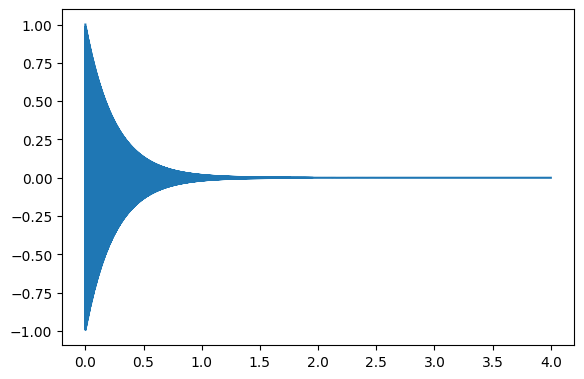

In [6]:

fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.plot(t, ideal1)
plt.show()